<a href="https://colab.research.google.com/github/bilaslsa/PRAKTIKUM_MACHINE_LEARNING_SEMESTER3/blob/main/Praktikum_3_regresi_sederhana.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/Praktikum 03"

In [ ]:
import pandas as pd

df = pd.read_csv(path + "/data/socr.csv")
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [ ]:
df.describe()

,Index,Height(Inches),Weight(Pounds)
count,25000.000000,25000.000000,25000.000000
mean,12500.500000,67.993114,127.079421
std,7217.022701,1.901679,11.660898
min,1.000000,60.278360,78.014760
25%,6250.750000,66.704397,119.308675
50%,12500.500000,67.995700,127.157750
75%,18750.250000,69.272958,134.892850
max,25000.000000,75.152800,170.924000


Konversi Data Menjadi CM dengan KG

In [ ]:
## Konversi Data Menjadi satuan CM dan Kg
df1 = (
    df[["Height(Inches)", "Weight(Pounds)"]]
    .rename(columns={
        "Height(Inches)": "tinggi_cm",
        "Weight(Pounds)": "berat_kg"
    })
    .assign(
        tinggi_cm=lambda d: d["tinggi_cm"] * 2.54,      # in → cm
        berat_kg=lambda d: d["berat_kg"] * 0.45359237   # lb → kg
    )
    .round({"tinggi_cm": 2, "berat_kg": 2})
    .copy()
)

df1.head()

,tinggi_cm,berat_kg
0,167.09,51.25
1,181.65,61.91
2,176.27,69.41
3,173.27,64.56
4,172.18,65.45


Split Data Training 80% dan Data Testing 20%

In [ ]:
from sklearn.model_selection import train_test_split

#variabel independent?bebas
X= df1[['tinggi_cm']]
#variabel dependent/terikat
y = df1[['berat_kg']]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=7
)

# cetak data training
X_train.head()

,tinggi_cm
3253,167.14
18789,178.49
4466,169.75
19269,181.97
6527,177.60


Pemodelan Data : Dengan Data Training

In [ ]:
# Pemodelan Data : dengan data training
from sklearn.linear_model import LinearRegression
#buat object model instan dari class LinearRegression
model = LinearRegression()
#lakukan proses training
model.fit(X_train, y_train)

LinearRegression()

Evaluasi Model

In [ ]:
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# prediksi model dengan data testing
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

df_resume = pd.DataFrame()
df_resume['R2']=[r2]
df_resume['Koefisien (Kg/cm)']= model.coef_[0]
df_resume['Intersep (Kg)']= model.intercept_
df_resume['MAE (kg)']= mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
df_resume['MSE (Kg)']=mse
df_resume['RMSE (Kg)']=rmse
df_resume

,R2,Koefisien (Kg/cm),Intersep (Kg),MAE (kg),MSE (Kg),RMSE (Kg)
0,0.249893,0.551823,-37.657089,3.670411,21.242938,4.609006


Mencetak Persamaan Regresi

In [ ]:
#persamaan regresi
slope = model.coef_[0].item()
intercept = model.intercept_.item()
print(f"Persamaan : y = {slope:.3f} * x {intercept:.3f}")

Persamaan : y = 0.552 * x -37.657


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# --- Asumsi data awal (ganti dengan data aktual Anda) ---
# Misalnya, kita membuat data dummy untuk demonstrasi
np.random.seed(42)
tinggi_cm = np.random.normal(165, 10, 100) # Tinggi dalam cm
berat_kg = 0.5 * tinggi_cm - 20 + np.random.normal(0, 5, 100) # Berat dalam kg
data = pd.DataFrame({'tinggi_cm': tinggi_cm, 'berat_kg': berat_kg})

# Memisahkan fitur (X) dan target (y)
X = data[['tinggi_cm']]
y = data['berat_kg']

# Memisahkan data training dan testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Membuat dan melatih model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# --- Bagian kode yang Anda minta ---

y_pred_test = model.predict(X_test)

# Buat tabel hasil (tinggi, aktual, prediksi, dan error)
hasil = pd.DataFrame({
    "Tinggi (cm)": X_test["tinggi_cm"].to_numpy(),
    "Berat aktual (kg)": y_test.to_numpy(),
    "Berat Prediksi (kg)": y_pred_test,
})

# 1) Selisih error (positif = overpredict)
hasil["Selisih error (kg)"] = hasil["Berat Prediksi (kg)"] - hasil["Berat aktual (kg)"]

# 2) Akurasi per-baris (100 * (1 - |error/aktual|)), dibatasi 0-100
denom = hasil["Berat aktual (kg)"].replace(0, np.nan) # antisipasi pembagi nol
hasil["Akurasi (%)"] = (1 - (hasil["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

hasil

,Tinggi (cm),Berat aktual (kg),Berat Prediksi (kg),Selisih error (kg),Akurasi (%)
0,159.817298,62.321011,60.348235,-1.972776,96.834493
1,171.116763,66.719650,65.198582,-1.521068,97.720210
2,168.613956,59.859406,64.124241,4.264835,92.875247
3,157.801558,62.809893,59.482969,-3.326924,94.703185
4,150.214780,56.406804,56.226310,-0.180494,99.680014
5,166.968612,57.329985,63.417969,6.087985,89.380802
6,165.675282,69.851613,62.862801,-6.988811,89.994775
7,162.803281,64.529977,61.629982,-2.899995,95.505972
8,160.365823,50.589055,60.583692,9.994636,80.243481
9,169.967142,57.906717,64.705102,6.798385,88.259765


Plot Regresi

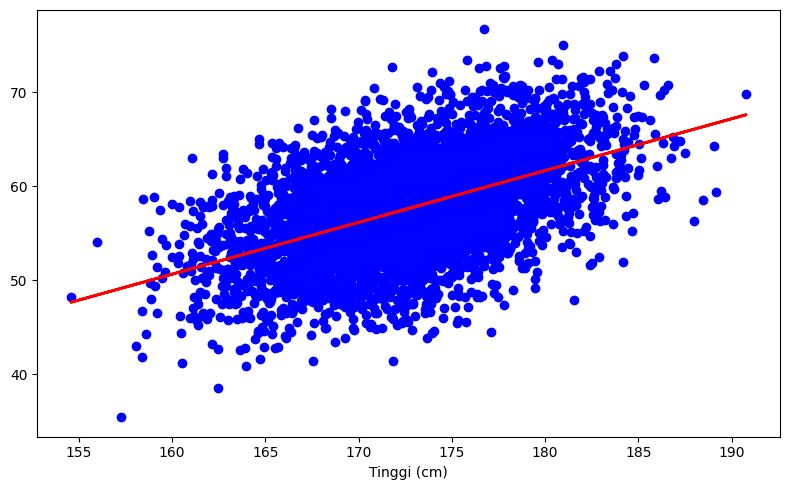

In [ ]:
import matplotlib.pyplot as plt

# Plot data scatter
plt.figure(figsize=(8, 5))
plt.scatter(X_test, y_test, color="blue", label="Data Aktual")

# Garis regresi
plt.plot(X_test, y_pred, color="red", linewidth=2, label="Prediksi")

plt.xlabel("Tinggi (cm)")
plt.tight_layout()
plt.show()

Data Testing

In [14]:
df_ti2022 = pd.read_csv("/content/drive/MyDrive/Praktikum 03/data/berat_ti2022.csv", sep=';')
df_ti2022.head()

,No,Nama,tinggi_cm,actual_berat
0,1,Rafa,168,58.5
1,2,Tiara,162,78.2
2,3,Tia,155,52.7
3,4,Kayla,160,70.3
4,5,Bani,183,65.8


In [ ]:
X_testing = df_ti2022[['tinggi_cm']]
X_testing

,tinggi_cm
0,168
1,162
2,155
3,160
4,183


In [ ]:
y_pred_testing = model.predict(X_testing)

# masukkan dalam dataframe
df_ti2022['berat_kg'] = y_pred_testing
df_ti2022['prediksi_kg'] = y_pred_testing
df_ti2022["Selisih error (kg)"] = df_ti2022["prediksi_kg"] - df_ti2022["actual_berat_kg"]
denom = df_ti2022["actual_berat_kg"].replace(0, np.nan)
df_ti2022["Akurasi (%)"] = (1 - (df_ti2022["Selisih error (kg)"].abs() / denom)).clip(lower=0, upper=1) * 100

df_ti2022

,No,Nama,tinggi_cm,actual_berat_kg,berat_kg
0,1,Rafa,168,58.5,55.049219
1,2,Tiara,162,78.2,51.738280
2,3,Tia,155,52.7,47.875517
3,4,Keyla,160,70.3,50.634633
4,5,Bani,183,65.8,63.326568


In [18]:
X_testing = df_ti2022[['tinggi_cm']]

# Prediksi
df_ti2022['prediksi_kg'] = model.predict(X_testing)

# Hitung selisih & akurasi
df_ti2022['selisih_kg'] = df_ti2022['actual_berat'] - df_ti2022['prediksi_kg']
df_ti2022['akurasi_%'] = 100 - (df_ti2022['selisih_kg'] / df_ti2022['actual_berat']).abs() * 100

# Hapus kolom 'berat_kg' & atur urutan
df_ti2024 = df_ti2022.drop(columns='berat_kg', errors='ignore')[
    ['No','Nama','tinggi_cm','actual_berat','prediksi_kg','selisih_kg','akurasi_%']
]

df_ti2022

,No,Nama,tinggi_cm,actual_berat,prediksi_kg,selisih_kg,akurasi_%
0,1,Rafa,168,58.5,63.860697,-5.360697,90.836415
1,2,Tiara,162,78.2,61.285170,16.914830,78.369782
2,3,Tia,155,52.7,58.280388,-5.580388,89.411029
3,4,Kayla,160,70.3,60.426661,9.873339,85.955421
4,5,Bani,183,65.8,70.299516,-4.499516,93.161830
